Construct a PCovR Map
===================

In [1]:
from sklearn.datasets import load_boston

from matplotlib import pyplot as plt
from matplotlib import cm
from tqdm.notebook import tqdm

import numpy as np

from skcosmo.decomposition import PCovR
from sklearn.preprocessing import StandardScaler

cmapX = cm.plasma
cmapy = cm.Greys

For this, we will use the boston housing data provided by scikit-learn.

In [2]:
X, y = load_boston(return_X_y=True)
y = y.reshape(X.shape[0], -1)

X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

Computing a simple PCovR and making a fancy plot of the results

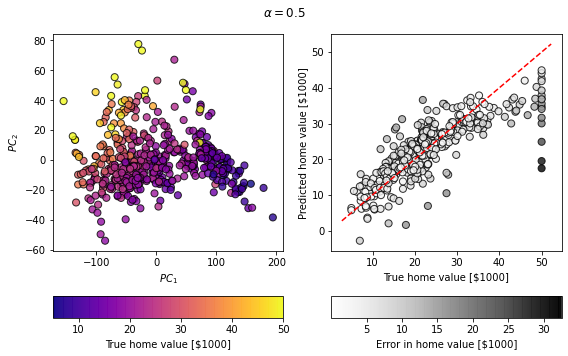

In [3]:
mixing = 0.5
pcovr = PCovR(mixing=mixing, 
              alpha=1E-8,
              n_components=2, )
pcovr.fit(X_scaled, y_scaled)
T = pcovr.transform(X_scaled)
yp = y_scaler.inverse_transform(pcovr.predict(X_scaled))

fig, ((axT, axy), (caxT, caxy)) = plt.subplots(
    2, 2, figsize=(8, 5), gridspec_kw=dict(height_ratios=(1, 0.1))
)

scatT = axT.scatter(T[:, 0], T[:, 1], s=50, alpha=0.8, c=y, cmap=cmapX, edgecolor="k")
axT.set_xlabel(r"$PC_1$")
axT.set_ylabel(r"$PC_2$")
fig.colorbar(scatT, cax=caxT, label="True home value [$1000]", orientation="horizontal")

scaty = axy.scatter(y, yp, s=50, alpha=0.8, c=np.abs(y - yp), cmap=cmapy, edgecolor="k")
axy.plot(axy.get_xlim(), axy.get_xlim(), 'r--')
fig.suptitle(r"$\alpha=$" + str(mixing))

axy.set_xlabel(r"True home value [$1000]")
axy.set_ylabel(r"Predicted home value [$1000]")
fig.colorbar(scaty, cax=caxy, label="Error in home value [$1000]", orientation="horizontal")

fig.tight_layout()

Surveying Many Mixing Parameters

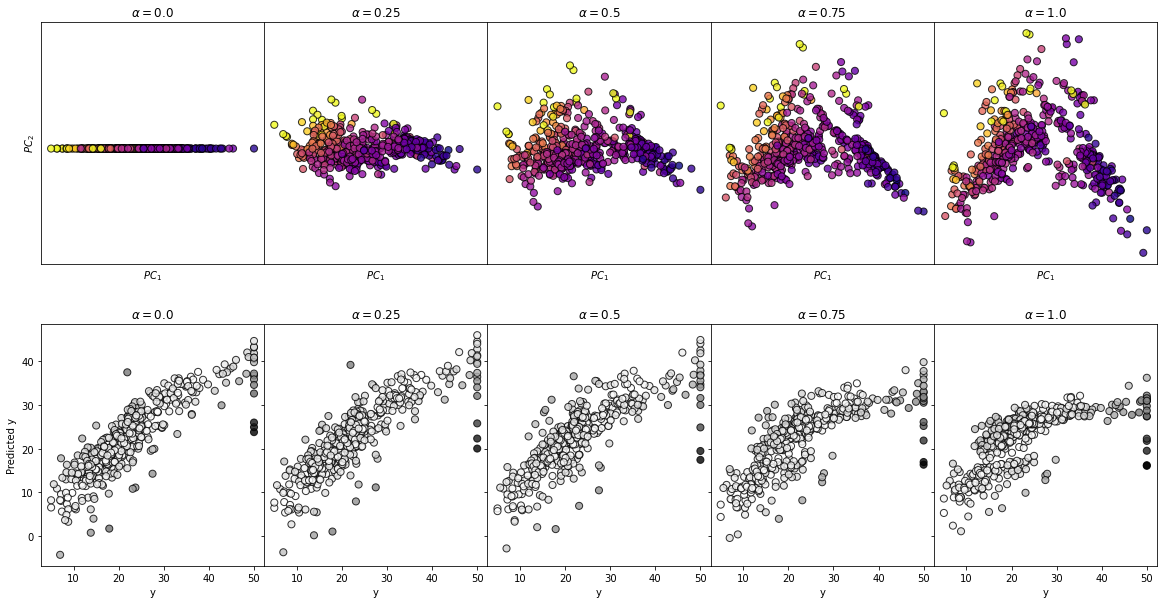

In [4]:
n_alpha = 5

fig, axes = plt.subplots(2, n_alpha, 
                         figsize=(4*n_alpha, 10),
                         sharey='row'
                        )

for i, mixing in enumerate(np.linspace(0, 1, n_alpha)):
    

    pcovr = PCovR(mixing=mixing, 
                      alpha=1E-8,
                      n_components=2, )
    pcovr.fit(X_scaled, y_scaled)
    T = pcovr.transform(X_scaled)
    yp = y_scaler.inverse_transform(pcovr.predict(X_scaled))

    axes[0, i].scatter(T[:, 0], 
                       T[:, 1], 
                       s=50, 
                       alpha=0.8,
                       c=y, 
                       cmap=cmapX,  
                       edgecolor='k'
                      )
    axes[0,i].set_title(r"$\alpha=$" + str(mixing))
    axes[0,i].set_xlabel(r"$PC_1$")
    axes[0,i].set_xticks([])
    axes[0,i].set_yticks([])

    axes[1, i].scatter(y, 
                       yp, 
                       s=50, 
                       alpha=0.8,
                       c=np.abs(y-yp), 
                       cmap=cmapy, 
                       edgecolor='k')
    axes[1,i].set_title(r"$\alpha=$" + str(mixing))
    axes[1,i].set_xlabel("y")
    
axes[0,0].set_ylabel(r"$PC_2$")
axes[1,0].set_ylabel("Predicted y")

fig.subplots_adjust(wspace=0, hspace=0.25)
plt.show()

Construct a Kernel PCovR Map
=========================

Moving from PCovR to KernelPCovR is much like moving from PCA to KernelPCA in `sklearn`. Like KernelPCA, KernelPCovR can compute any pairwise kernel supported by `sklearn` or operate on a precomputed kernel.

In [5]:
from skcosmo.decomposition import KPCovR

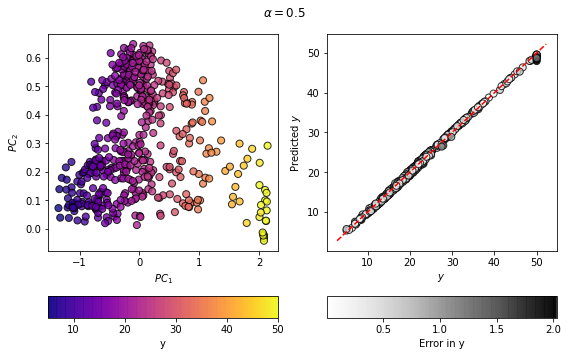

In [6]:
mixing = 0.5
kpcovr = KPCovR(
    mixing=mixing,
    alpha=1e-8,
    kernel="rbf",
    gamma=0.1,
    n_components=2,
)
kpcovr.fit(X_scaled, y_scaled)
T = kpcovr.transform(X_scaled)
yp = y_scaler.inverse_transform(kpcovr.predict(X_scaled))

fig, ((axT, axy), (caxT, caxy)) = plt.subplots(
    2, 2, figsize=(8, 5), gridspec_kw=dict(height_ratios=(1, 0.1))
)

scatT = axT.scatter(T[:, 0], T[:, 1], s=50, alpha=0.8, c=y, cmap=cmapX, edgecolor="k")
axT.set_xlabel(r"$PC_1$")
axT.set_ylabel(r"$PC_2$")
fig.colorbar(scatT, cax=caxT, label="y", orientation="horizontal")

scaty = axy.scatter(y, yp, s=50, alpha=0.8, c=np.abs(y - yp), cmap=cmapy, edgecolor="k")
axy.plot(axy.get_xlim(), axy.get_xlim(), "r--")
fig.suptitle(r"$\alpha=$" + str(mixing))

axy.set_xlabel(r"$y$")
axy.set_ylabel(r"Predicted $y$")
fig.colorbar(scaty, cax=caxy, label="Error in y", orientation="horizontal")

fig.tight_layout()

As you can see, the regression error has decreased considerably from the linear case, meaning that the map on the left can, and will, better correlate with the target values.

Note on KPCovR for Atoms, Molecules, and Structures
-----------------------------------------------------------------

Applying this to datasets involving collections of atoms and their atomic descriptors, it's important to consider the nature of the property you are learning and the samples you are comparing before constructing a kernel, for example, whether the analysis is to be based on whole structures or individual atomic environments. For more detail, see Appendix C of [Helfrecht 2020](https://iopscience.iop.org/article/10.1088/2632-2153/aba9ef) or regarding kernels involving gradients [Musil 2021](https://arxiv.org/pdf/2101.08814.pdf).